# **BA305 Group Project: Cancer Detection from Tumors**

In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import *
from sklearn import metrics
%matplotlib inline
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
!git clone https://github.com/smileyfish4/BA305FINALPROJECT.git

Cloning into 'BA305FINALPROJECT'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 9), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 1.31 MiB | 3.59 MiB/s, done.
Resolving deltas: 100% (9/9), done.


# **Preprocessing**

In [3]:
# load data as a dataframe
cancer_df = pd.read_csv('BA305FINALPROJECT/cancer_data.csv')
# check if data is loaded correctly
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# print a concise summary of the Dataframe
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# drop Unnamed: 32 and id
cancer_df = cancer_df.drop(['Unnamed: 32', 'id'], axis=1)
# drop all standard error columns
for column in cancer_df.columns:
    if '_se' in column:
        cancer_df = cancer_df.drop(column, axis=1)
#change spaces to _
cancer_df.columns = cancer_df.columns.str.replace(' ', '_')
# Convert M/B into 1/0
cancer_df.diagnosis.replace(('M', 'B'), (1, 0), inplace=True)
#check it dropped the columns correctly
cancer_df.head()

<ipython-input-5-53d59e3cbc4a>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cancer_df.diagnosis.replace(('M', 'B'), (1, 0), inplace=True)
<ipython-input-5-53d59e3cbc4a>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cancer_df.diagnosis.replace(('M', 'B'), (1, 0), inplace=True)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Training and Splitting

In [6]:
# Define X (inputs/predictors) and y (output/outcome)
X = cancer_df.drop(columns=['diagnosis'])
y = cancer_df['diagnosis']

In [7]:
# Split data between training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [8]:
# Create scores dictionary to hold accuracy, precision, recall, and f1 scores
scores_dict = {}

In [9]:
#Standardize the data
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Checking Imbalance

In [10]:
malignant_count = len(cancer_df.loc[cancer_df['diagnosis'] == 1])
benign_count = len(cancer_df.loc[cancer_df['diagnosis'] == 0])

print('Number of malignant tumors in dataset: ', malignant_count)
print('Number of benign tumors in dataset: ', benign_count)

r1 = round(malignant_count / len(cancer_df) * 100, 2)
r2 = round(benign_count / len(cancer_df) * 100, 2)
print('Malignant vs. Benign: ', r1, '%',  ':', r2, '%' )

Number of malignant tumors in dataset:  212
Number of benign tumors in dataset:  357
Malignant vs. Benign:  37.26 % : 62.74 %


# Baseline Model: Majority Rule

In [11]:
base_train = y_train.value_counts().idxmax()
print("Majority Class:", base_train)

Majority Class: 0


In [12]:
base_test = y_test.value_counts()
base_acc = base_test[base_train] / (base_test[0] + base_test[1])

print('Baseline model accuracy: ', (base_acc))

Baseline model accuracy:  0.6359649122807017


# **Decision Tree**

## Full Tree

In [13]:
# Build "Full Tree"
full_clf = DecisionTreeClassifier(random_state=0)
full_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
#print basic structure of full tree
print('Number of classes: ', full_clf.tree_.n_classes)
print('Number of features: ', full_clf.tree_.n_features)
print('Number of nodes: ', full_clf.tree_.node_count)
print('Number of leaves: ', full_clf.tree_.n_leaves)
print('Number of maximum depth: ', full_clf.tree_.max_depth)

Number of classes:  [2]
Number of features:  20
Number of nodes:  37
Number of leaves:  19
Number of maximum depth:  8


In [15]:
# Text representation of full tree
text_representation = tree.export_text(full_clf)
print(text_representation)

|--- feature_7 <= 0.05
|   |--- feature_13 <= 1265.00
|   |   |--- feature_15 <= 0.45
|   |   |   |--- feature_13 <= 952.90
|   |   |   |   |--- feature_11 <= 30.15
|   |   |   |   |   |--- feature_18 <= 0.20
|   |   |   |   |   |   |--- feature_7 <= 0.03
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_7 >  0.03
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_18 >  0.20
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_11 >  30.15
|   |   |   |   |   |--- feature_11 <= 30.31
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_11 >  30.31
|   |   |   |   |   |   |--- feature_1 <= 23.20
|   |   |   |   |   |   |   |--- feature_0 <= 12.57
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  12.57
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  23.20
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_13 

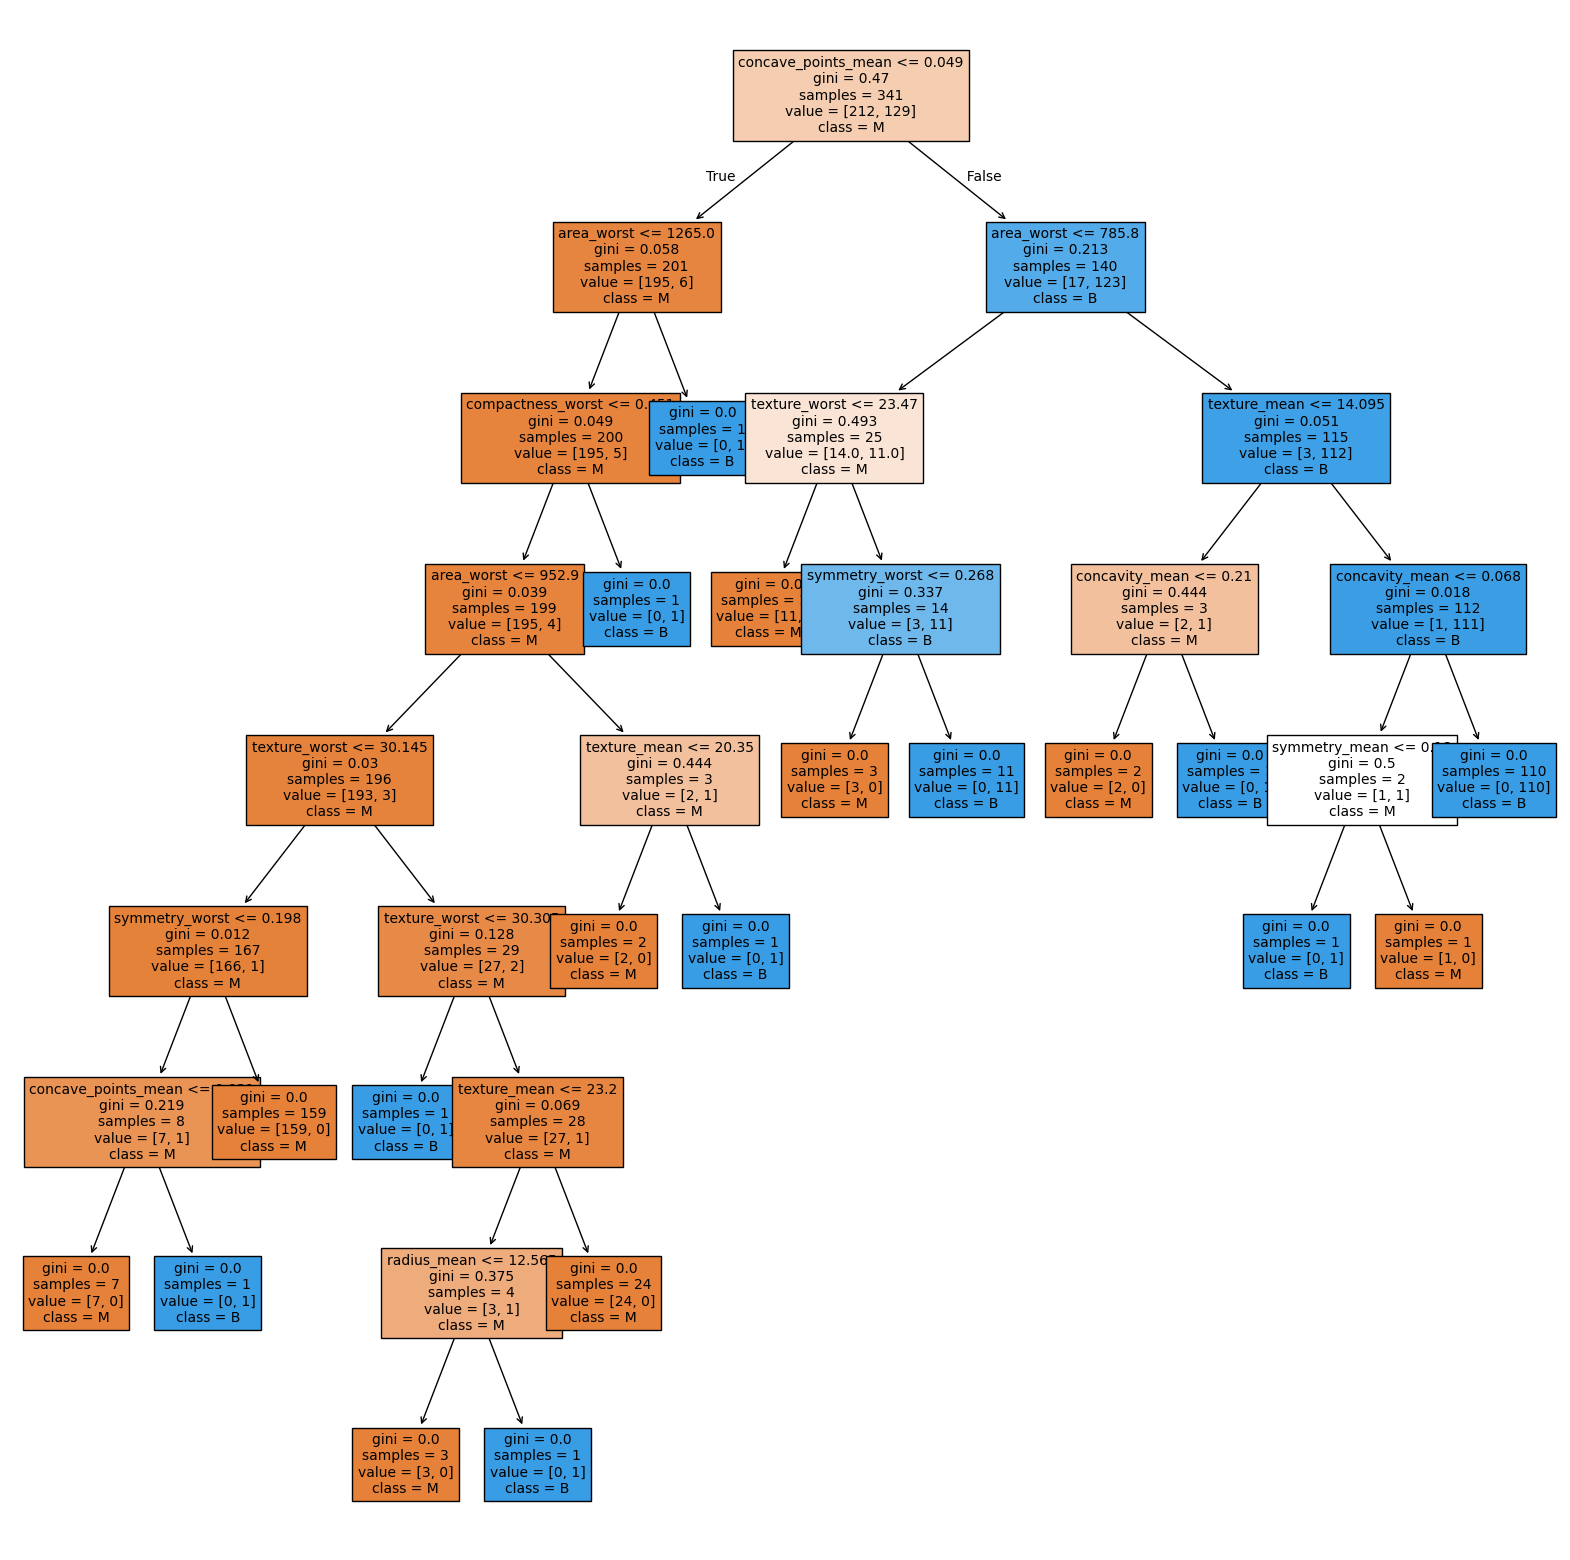

In [16]:
# Visualize the full tree via "plot_tree" function

# Re-size the figure via matplotlib
plt.figure(figsize=(20,20))

# call plot_tree function to plot the tree
cnames = ['M', 'B']
tree.plot_tree(full_clf, feature_names = X_train.columns, class_names = cnames, fontsize = 10, filled = True);

In [17]:
# Feed input data to model to predict y output for test data
y_pred_FT = full_clf.predict(X_test)

In [18]:
# Accuracy of full tree on test sets
test_score = accuracy_score(y_test, y_pred_FT)

print('Accuracy score of full tree on testing data =', round(test_score*100,1), '%')

#append accuracy score, percision, recall, and F1 score to dictionary
accuracyFT = test_score
precisionFT = precision_score(y_test, y_pred_FT)
recallFT = recall_score(y_test, y_pred_FT)
f1FT = f1_score(y_test, y_pred_FT)
scores_dict['Full Tree'] = [accuracyFT, precisionFT, recallFT, f1FT]

# calculate probabilities

Accuracy score of full tree on testing data = 90.8 %


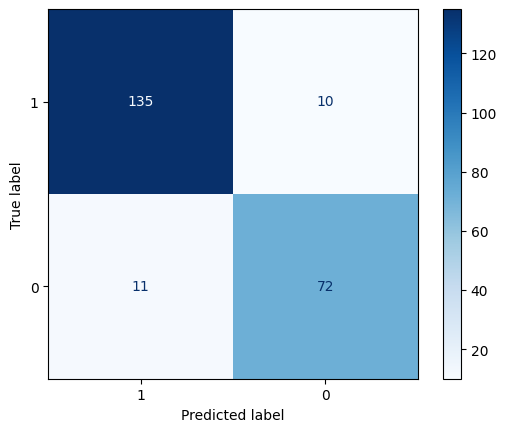

In [19]:
# Confusion matrix of full tree on test set
cm = confusion_matrix(y_test, y_pred_FT)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer_df.diagnosis.unique())
disp.plot(cmap=plt.cm.Blues)
plt.show()

The final accuracy of the full tree on the testing data is 89.5% which is not a great accuracy score. The confusion matrix states that it correctly identified 133 patients as having a malignant tumor when they had a malignant tumor (true positive) and correctly identified 71 patients as having a benign tumor when they had a benign tumor (true negative). However, it incorrectly categorized 12 patients as having a malignant tumor when they had a benign tumor (false positive) and incorreclty categorized 12 patients as having a benign tumor when they had a malignant tumor (false negative).

### Feature Importance

In [20]:
# Extract importance values for each feature (column of X)
importances1 = full_clf.feature_importances_

# create a dataframe to store the values and their labels
cancer_decFT_features_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances1})

# sort dataframe by descending order, showing the most important feature top
cancer_decFT_features_df  = cancer_decFT_features_df.sort_values('importance', ascending = False)
cancer_decFT_features_df.head()

,feature,importance
7,concave_points_mean,0.752098
13,area_worst,0.088513
11,texture_worst,0.059834
18,symmetry_worst,0.030875
1,texture_mean,0.026745


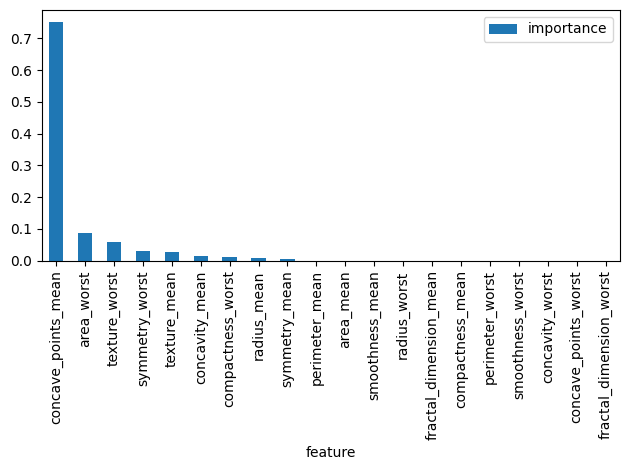

In [21]:
# plot the importance of each feature
ax1 = cancer_decFT_features_df.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

## Pruned Decision Tree

In [23]:
alphas = full_clf.cost_complexity_pruning_path(X_train, y_train).ccp_alphas
alphas

array([0.        , 0.00282782, 0.00288887, 0.00290637, 0.00391007,
       0.00557565, 0.0074135 , 0.01382488, 0.02230415, 0.03433417,
       0.34863814])

In [24]:
# Create a decision tree for each possible value of alpha, and store the
# trees in an array called 'clfs'

clfs = [] # this creates an empty array (placeholder)

# now loop through all the possible alphas
for i in alphas:
    my_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    my_clf.fit(X_train, y_train)
    clfs.append(my_clf) #this line adds to the fitted tree to the clfs[] array

# Display final array of Trees:
clfs

[DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.002827817343946376),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.002888868304656927),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.00290636782572266),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0039100684261974585),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.005575652587795639),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.007413495807605221),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.01382488479262673),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.02230414746543779),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.034334165133604

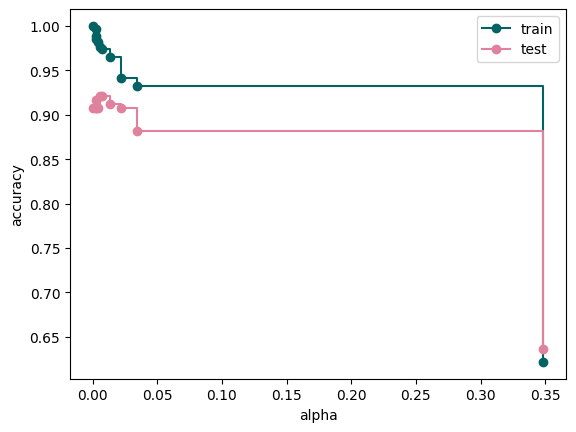

In [25]:
# Plot the tree predictive accuracy as a function of alpha
train_scores_PT = [accuracy_score(y_train, x.predict(X_train)) for x in clfs]
test_scores_PT = [accuracy_score(y_test, x.predict(X_test)) for x in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(alphas, train_scores_PT, marker="o", label="train", drawstyle="steps-post", color = '#036264')
ax.plot(alphas, test_scores_PT, marker="o", label="test", drawstyle="steps-post", color = '#e0819d')
ax.legend()
plt.show()

It is hard to evaluate based on the gaph above due to the outlier alpha of  0.34863814. Since it gives a low accuracy, which we don't want, we removed the outlier to find a better alpha score to prune our data with.

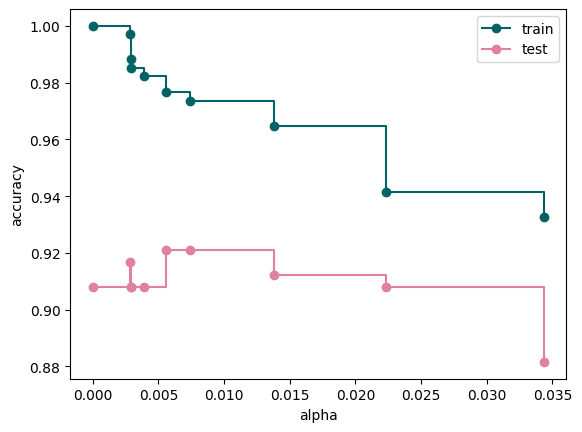

In [26]:
# Set threshold to keep top 80% of test accuracy
train_scores_threshold = train_scores_PT[:-1]
test_scores_threshold = test_scores_PT[:-1]
alphas_threshold = alphas[:-1]


fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(alphas_threshold, train_scores_threshold, marker="o", label="train", drawstyle="steps-post", color = '#036264')
ax.plot(alphas_threshold, test_scores_threshold, marker="o", label="test", drawstyle="steps-post", color = '#e0819d')
ax.legend()
plt.show()

Based on this graph it appears that the alpha 0.0223 is the best since it has the smallest gap but we can check this below.

In [27]:
# Set threshold to keep top 80% of test accuracy
threshold = max(test_scores_PT) * 0.8
filtered_indices = [i for i in range(len(test_scores_PT)) if test_scores_PT[i] >= threshold]

# Among those, find the one with the smallest gap between testing and training data
best_index = min(filtered_indices, key=lambda i: abs(train_scores_PT[i] - test_scores_PT[i]))
best_alpha = alphas[best_index]

print(f"Best alpha (top accuracy + smallest gap): {best_alpha}")
print('Accuracy score of pruned tree on testing data =', round(test_scores_PT[best_index]*100,1), '%')

Best alpha (top accuracy + smallest gap): 0.02230414746543779
Accuracy score of pruned tree on testing data = 90.8 %


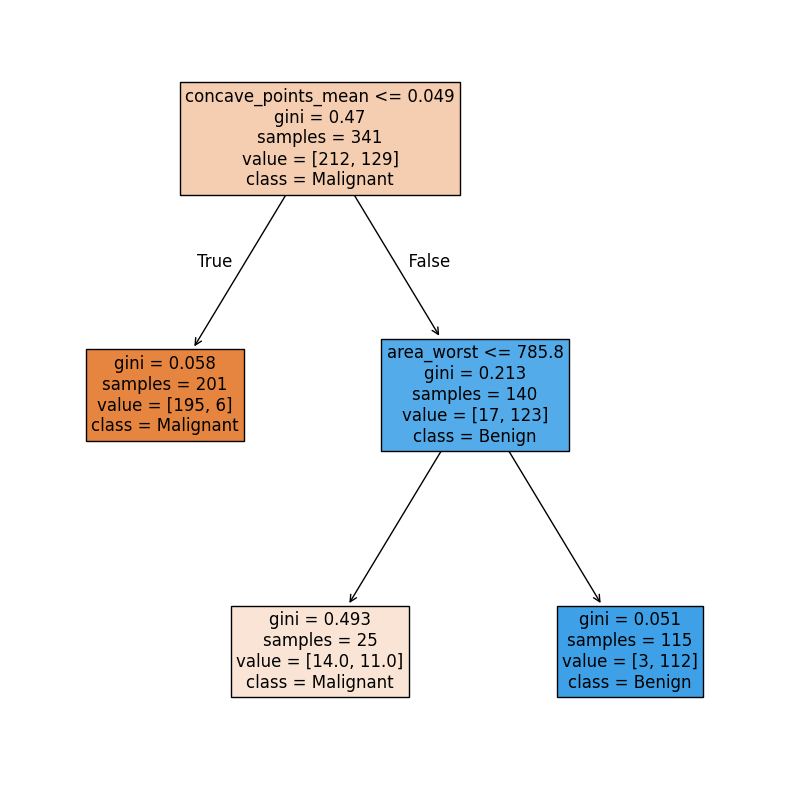

In [28]:
pruned_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
pruned_clf.fit(X_train, y_train)

fig = plt.figure(figsize = (10,10))

y_pred_PT = pruned_clf.predict(X_test)

cnames = ['Malignant','Benign']
tree.plot_tree(pruned_clf, fontsize = 12, feature_names = X_train.columns, class_names = cnames, filled = True);

In [29]:
#append scores to dictionary
accuracyPT = test_scores_PT[best_index]
precisionPT = precision_score(y_test, y_pred_PT)
recallPT = recall_score(y_test, y_pred_PT)
f1PT = f1_score(y_test, y_pred_PT)
scores_dict['Pruned Tree'] = [accuracyPT, precisionPT, recallPT, f1PT]

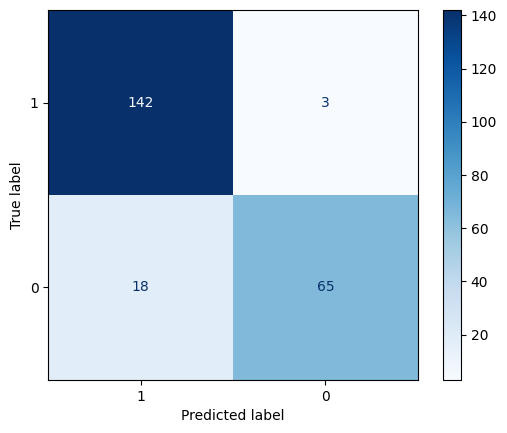

In [30]:
# Confusion matrix of pruned tree
cm = confusion_matrix(y_test, y_pred_PT)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer_df.diagnosis.unique())
disp.plot(cmap=plt.cm.Blues)
plt.show()

The pruned tree only gives us slightly better accuracy than the full tree with an accuracy score of 90.8%.

According to our pruned tree analysis, the most important feature is concave_points_mean, the average number of concaved points on the tumor.

### Feature Importance

In [32]:
# Extract importance values for each feature (column of X)
importances2 = pruned_clf.feature_importances_

# create a dataframe to store the values and their labels
cancer_decPT_features_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances2})

# sort dataframe by descending order, showing the most important feature top
cancer_decPT_features_df  = cancer_decPT_features_df.sort_values('importance', ascending = False)
cancer_decPT_features_df.head()

,feature,importance
7,concave_points_mean,0.910348
13,area_worst,0.089652
0,radius_mean,0.000000
1,texture_mean,0.000000
3,area_mean,0.000000


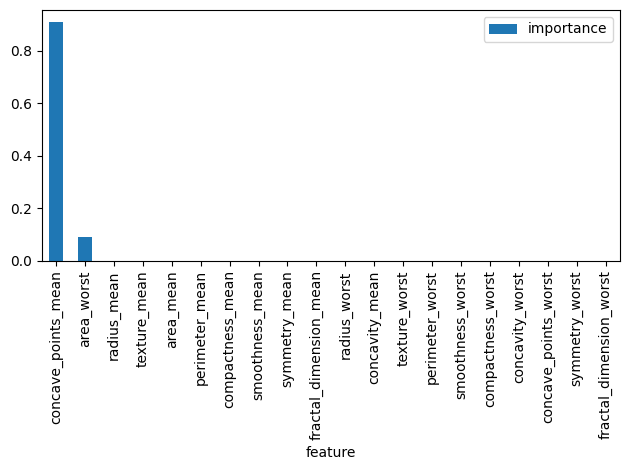

In [34]:
# plot the importance of each feature
ax = cancer_decPT_features_df.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

This tells us that the feature with the most decision making power is concave_mean_points (the mean number of concaved points on the tumor).

# **Random Forests**

In [ ]:
# Run random forest classifier 10,000 times
rf = RandomForestClassifier(
    n_estimators=10000,
    random_state=0,
    criterion='gini')
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000, random_state=0)

In [ ]:
# Print the accuracy score of the best found tree in the forest
y_pred_rf = rf.predict(X_test)
print('Accuracy score of random forests on testing data =', round(accuracy_score(y_test, y_pred_rf)*100,1), '%')

#append scores to dictionary
accuracyRF = accuracy_score(y_test, y_pred_rf)
precisionRF = precision_score(y_test, y_pred_rf)
recallRF = recall_score(y_test, y_pred_rf)
f1RF = f1_score(y_test, y_pred_rf)
scores_dict['Random Forest'] = [accuracyRF, precisionRF, recallRF, f1RF]

Accuracy score of random forests on testing data = 96.1 %


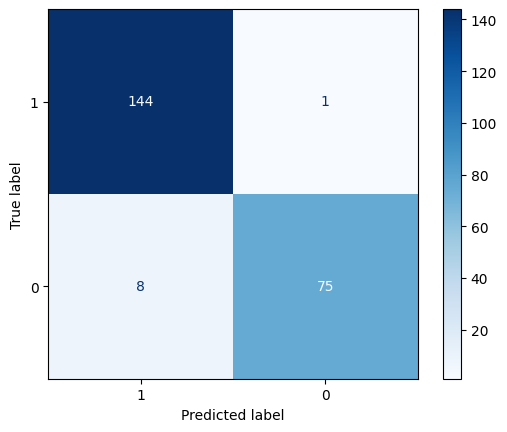

In [ ]:
# Confusion matrix of random forest
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer_df.diagnosis.unique())
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Feature Importance

In [ ]:
# Extract importance values for each feature (column of X)
importances = rf.feature_importances_

# create a dataframe to store the values and their labels
cancer_rf_features_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
cancer_rf_features_df  = cancer_rf_features_df.sort_values('importance', ascending = False)
cancer_rf_features_df.head()

,feature,importance
7,concave_points_mean,0.168375
17,concave_points_worst,0.165378
12,perimeter_worst,0.129752
13,area_worst,0.090122
10,radius_worst,0.089546


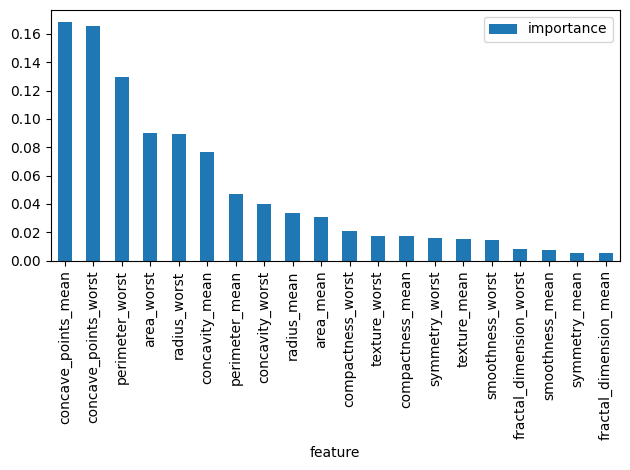

In [ ]:
# plot the importance of each feature
ax = cancer_rf_features_df.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

The feature importance remained the same for the random forest as well. The feature with the most decision making power is concave_mean_points (the mean number of concaved points on the tumor).

# K-Nearest Neighbours

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)
y_pred_knn = knn_1.predict(X_test_scaled)

print('Accuracy score of KNN on testing data before checking best k =', round(accuracy_score(y_test, y_pred_knn)*100,1), '%')

Accuracy score of KNN on testing data before checking best k = 63.6 %


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
best_k = []

for k in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=k)

    best_k.append({
        'k': k,
        'accuracy': cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    })

kresults_df = pd.DataFrame(best_k)
kresults_df

,k,accuracy
0,1,0.944246
1,2,0.953026
2,3,0.967732
3,4,0.970673
4,5,0.973615
...,...,...
95,96,0.906181
96,97,0.906181
97,98,0.906181
98,99,0.906181


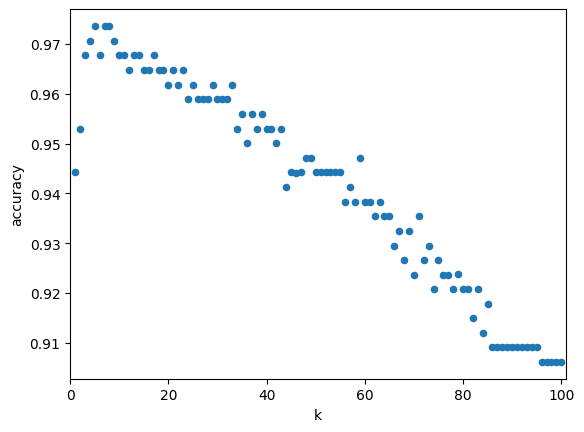

In [ ]:
#plot accuracy vs. k
kresults_df.plot.scatter(x='k', y='accuracy', xlim=[0, 101]);

In [ ]:
# Find the max value and associated index
max_val = kresults_df['accuracy'].max()
max_val_idx = kresults_df['accuracy'].idxmax()

print("Max value =", max_val, '|', " Best k =", kresults_df['k'][max_val_idx])

Max value = 0.9736146632566071 |  Best k = 5


Accuracy score of KNN on testing data with best k =: 93.4 %


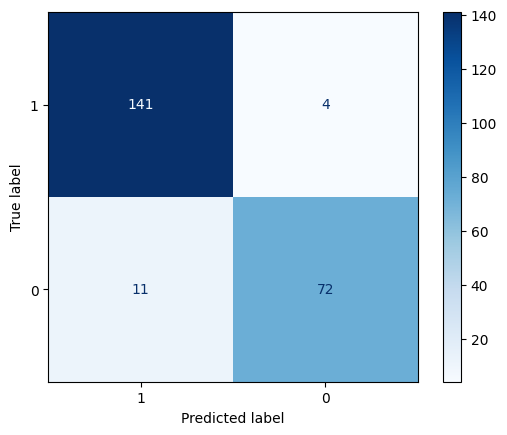

In [ ]:
# Confusion matrix and accuracy for the validation data, using best k = 17
knn_best = KNeighborsClassifier(n_neighbors=17)
knn_best.fit(X_train_scaled, y_train)

y_pred_knn_best = knn_best.predict(X_test_scaled)
knn_cm = confusion_matrix(y_test, y_pred_knn_best)
print('Accuracy score of KNN on testing data with best k =:', round(accuracy_score(y_test, y_pred_knn_best)*100,1),'%')

#append scores to dictionary
accuracyKNN = accuracy_score(y_test, y_pred_knn_best)
precisionKNN = precision_score(y_test, y_pred_knn_best)
recallKNN = recall_score(y_test, y_pred_knn_best)
f1KNN = f1_score(y_test, y_pred_knn_best)
scores_dict['K-Nearest Neighbours'] = [accuracyKNN, precisionKNN, recallKNN, f1KNN]

# Plot the confusion matrix
kdisp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=cancer_df.diagnosis.unique())
kdisp.plot(cmap=plt.cm.Blues)
plt.show()

# Naive Bayes Classifier

Due to use using continuous numerical features, we felt Gaussian Naive Bayes would do a better job.

Accuracy score of Gaussian Naive Bayes Classifier on testing data = 91.2 %


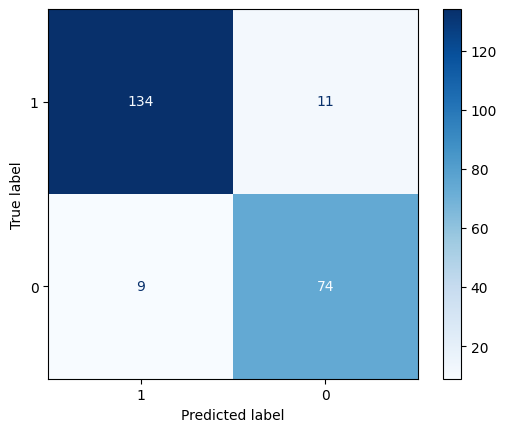

In [ ]:
# Training Gaussian Naive Bayes on standardized data
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Prediction
y_pred_gnb = gnb.predict(X_test_scaled)
gnb_cm = confusion_matrix(y_test, y_pred_gnb)

# Evaluating performance
print('Accuracy score of Gaussian Naive Bayes Classifier on testing data =', round(accuracy_score(y_test, y_pred_gnb)*100,1), '%')

#append scores to dictionary
accuracyGNB = accuracy_score(y_test, y_pred_gnb)
precisionGNB = precision_score(y_test, y_pred_gnb)
recallGNB = recall_score(y_test, y_pred_gnb)
f1GNB = f1_score(y_test, y_pred_gnb)
scores_dict['Gaussian Naive Bayes'] = [accuracyGNB, precisionGNB, recallGNB, f1GNB]

# Plot the confusion matrix
gnbdisp = ConfusionMatrixDisplay(confusion_matrix=gnb_cm, display_labels=cancer_df.diagnosis.unique())
gnbdisp.plot(cmap=plt.cm.Blues)
plt.show()

# Logistic Regression

Accuracy score of Logistic Regression on testing data = 94.7 %


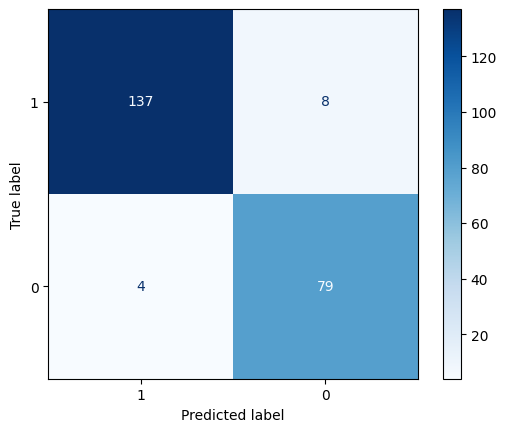

In [ ]:
# Logisitc Regression
lr = LogisticRegression(penalty=None, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr.predict(X_test_scaled)
y_log_proba = lr.predict_proba(X_test_scaled)
lr_cm = confusion_matrix(y_test, y_pred_lr)

# Evaluating performance
print('Accuracy score of Logistic Regression on testing data =', round(accuracy_score(y_test, y_pred_lr)*100,1), '%')

# append scores to dictionary
accuracyLR = accuracy_score(y_test, y_pred_lr)
precisionLR = precision_score(y_test, y_pred_lr, average = 'macro')
recallLR = recall_score(y_test, y_pred_lr, average = 'macro')
f1LR = f1_score(y_test, y_pred_lr, average = 'macro')
scores_dict['Logisic Regression'] = [accuracyLR, precisionLR, recallLR, f1LR]

# Plot the confusion matrix
lrdisp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=cancer_df.diagnosis.unique())
lrdisp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       145
           1       0.91      0.95      0.93        83

    accuracy                           0.95       228
   macro avg       0.94      0.95      0.94       228
weighted avg       0.95      0.95      0.95       228



# Model Analysis

So far logistic regression seems the best

## PR and AUC

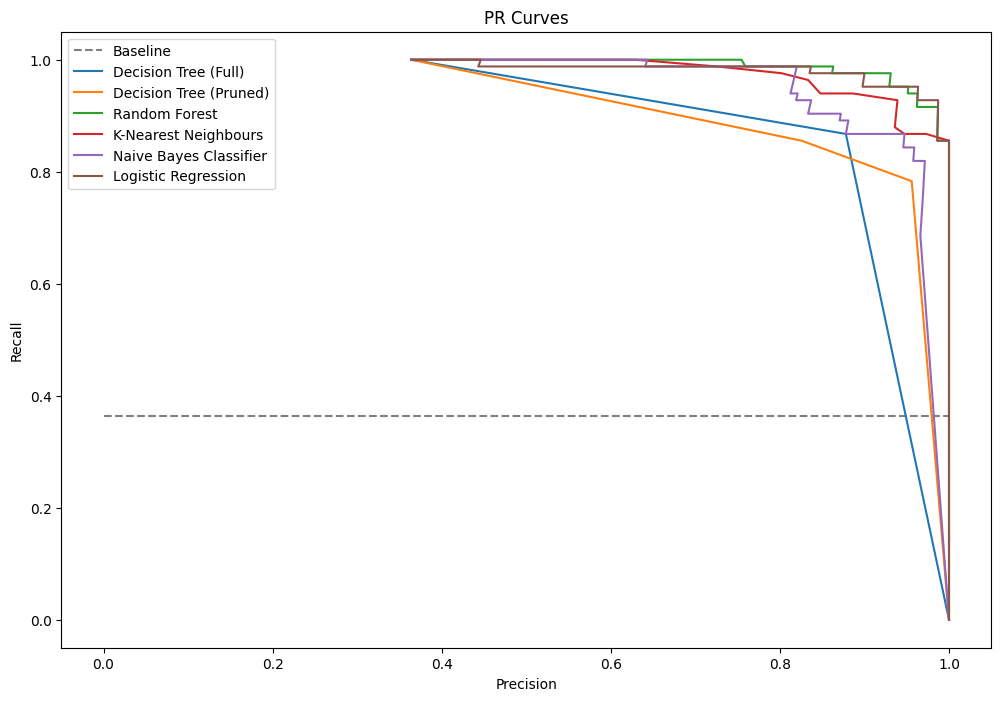

In [ ]:
# An empty list for area under the ROC Curve for varied models.
auc = []

plt.figure(figsize=(12, 8))

# Baseline
baseline = sum(y_test) / len(y_test)
plt.hlines(baseline, xmin=0, xmax=1, linestyles='dashed', colors='gray', label='Baseline')
auc.append(baseline)

# extract roc curve values: Decision Tree (Full)
y_probs_FT = full_clf.predict_proba(X_test)[:, 1] # Select the probabilities for the positive class
per_FT, rec_FT, thresholds_FT = precision_recall_curve(y_test, y_probs_FT)
auc_FT = metrics.roc_auc_score(y_test, y_probs_FT)
auc.append(auc_FT)

# extract roc curve values: Decision Tree (Pruned)
y_probs_PT = pruned_clf.predict_proba(X_test)[:, 1] # Select the probabilities for the positive class
per_PT, rec_PT, thresholds_PT = precision_recall_curve(y_test, y_probs_PT)
auc_PT = metrics.roc_auc_score(y_test, y_probs_PT)
auc.append(auc_PT)

# extract roc curve values: Random Forest
y_probs_RF = rf.predict_proba(X_test)[:, 1] # Select the probabilities for the positive class
per_RF, rec_RF, thresholds_RF = precision_recall_curve(y_test, y_probs_RF)
auc_RF = metrics.roc_auc_score(y_test, y_probs_RF)
auc.append(auc_RF)

# extract roc curve values: K-Nearest Neighbours
y_probs_KNN = knn_best.predict_proba(X_test_scaled)[:, 1] # Select the probabilities for the positive class
per_KNN, rec_KNN, thresholds_KNN = precision_recall_curve(y_test, y_probs_KNN)
auc_KNN = metrics.roc_auc_score(y_test, y_probs_KNN)
auc.append(auc_KNN)

# extract roc curve values: Gaussian Naive Bayes
y_probs_GNB = gnb.predict_proba(X_test_scaled)[:, 1] # Select the probabilities for the positive class
per_GNB, rec_GNB, thresholds_GNB = precision_recall_curve(y_test, y_probs_GNB)
auc_GNB = metrics.roc_auc_score(y_test, y_probs_GNB)
auc.append(auc_GNB)

# extract roc curve values: Logistic Regression
y_probs_LR = lr.predict_proba(X_test_scaled)[:, 1] # Select the probabilities for the positive class
per_LR, rec_LR, thresholds_LR = precision_recall_curve(y_test, y_probs_LR)
auc_LR = metrics.roc_auc_score(y_test, y_probs_LR)
auc.append(auc_LR)

# plot roc curve
plt.plot(per_FT,rec_FT)
plt.plot(per_PT,rec_PT)
plt.plot(per_RF,rec_RF)
plt.plot(per_KNN,rec_KNN)
plt.plot(per_GNB,rec_GNB)
plt.plot(per_LR, rec_LR)

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('PR Curves')
plt.legend(['Baseline', 'Decision Tree (Full)', 'Decision Tree (Pruned)', 'Random Forest', 'K-Nearest Neighbours', 'Naive Bayes Classifier', 'Logistic Regression'])
plt.show()

In [ ]:
models = ['Baseline','Decision Tree (Full)', 'Decision Tree (Pruned)', 'Random Forest', 'K-Nearest Neighbours', 'Naive Bayes Classifier', 'Logistic Regression']
auc_df = pd.DataFrame(index = models)
auc_df["AUC"] = auc
auc_df

,AUC
Baseline,0.364035
Decision Tree (Full),0.899252
Decision Tree (Pruned),0.907644
Random Forest,0.994474
K-Nearest Neighbours,0.987827
Naive Bayes Classifier,0.975987
Logistic Regression,0.987619


## Precision-Recall Comparison

In [ ]:
scores_dict

{'Full Tree': [0.9078947368421053,
  0.8780487804878049,
  0.8674698795180723,
  0.8727272727272727],
 'Pruned Tree': [0.9078947368421053,
  0.9558823529411765,
  0.7831325301204819,
  0.8609271523178808],
 'Random Forest': [0.9605263157894737,
  0.9868421052631579,
  0.9036144578313253,
  0.9433962264150944],
 'K-Nearest Neighbours': [0.9342105263157895,
  0.9473684210526315,
  0.8674698795180723,
  0.9056603773584906],
 'Gaussian Naive Bayes': [0.9122807017543859,
  0.8705882352941177,
  0.891566265060241,
  0.8809523809523809],
 'Logisic Regression': [0.9473684210526315,
  0.9398385913426266,
  0.9483174075612796,
  0.9437268613739203]}

In [ ]:
# turn scores dictionary into dataframe for readability
scores_df = pd.DataFrame.from_dict(scores_dict, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1'])
scores_df

,Accuracy,Precision,Recall,F1
Full Tree,0.907895,0.878049,0.867470,0.872727
Pruned Tree,0.907895,0.955882,0.783133,0.860927
Random Forest,0.960526,0.986842,0.903614,0.943396
K-Nearest Neighbours,0.934211,0.947368,0.867470,0.905660
Gaussian Naive Bayes,0.912281,0.870588,0.891566,0.880952
Logisic Regression,0.947368,0.939839,0.948317,0.943727


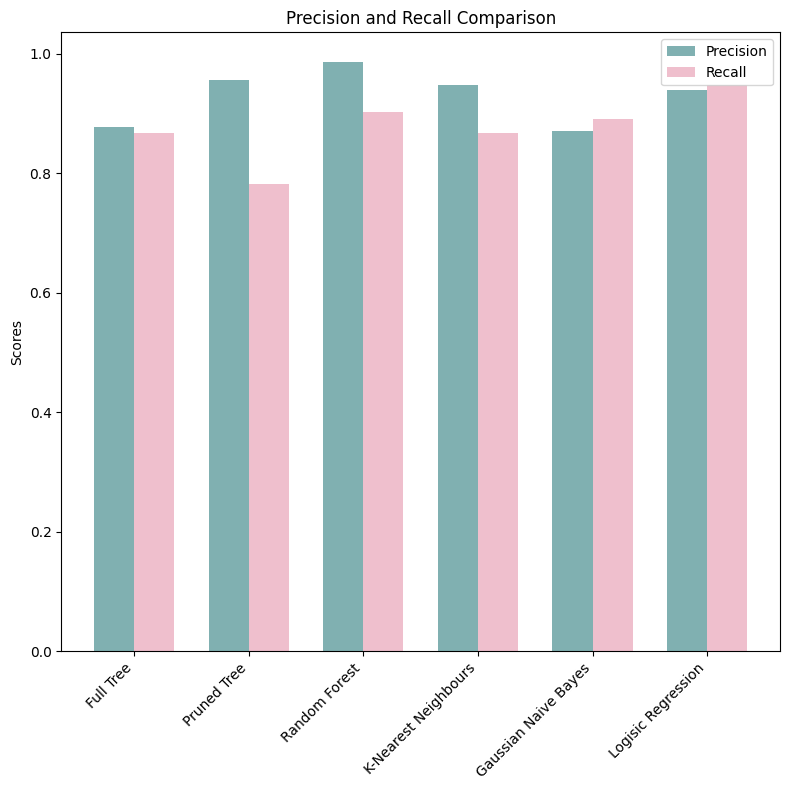

In [ ]:
precision = scores_df['Precision']
recall = scores_df['Recall']

plt.figure(figsize=(8, 8))

# Use the index of scores_df (model names) as x-axis ticks
x_ticks = scores_df.index

# Create bar plots
bar_width = 0.35
x_pos_precision = np.arange(len(x_ticks))
x_pos_recall = x_pos_precision + bar_width

plt.bar(x_pos_precision, precision, width=bar_width, label='Precision', alpha=0.5,color = '#036264')
plt.bar(x_pos_recall, recall, width=bar_width, label='Recall', alpha=0.5, color = '#e0819d')

# Set x-axis ticks and labels
plt.xticks(x_pos_precision + bar_width / 2, x_ticks, rotation=45, ha='right')

plt.legend(loc='upper right')
plt.ylabel('Scores')
plt.title('Precision and Recall Comparison')
plt.tight_layout()
plt.show()